In [4]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# Create data arrays
<img src='assets/data.png'>

In [5]:
# X = (hours sleeping, hours studying), y = Score on test
X = np.array([[3,5],[5,1],[10,2]], dtype=float)
y = np.array([[75],[82],[93]], dtype=float)

# Normalize data

In [6]:
# Normalize
X_train = X/np.amax(X, axis=0)
y_train = y/100 # Max test score is 100

# Define The neural Network class

1 - Define the hyper parameters

2 - Initiate the weights

3 - Feed forward

<img src='assets/nn.png'>

<img src='assets/derivatives.png'>

In [60]:
class NeuralNetwork():
    def __init__(self, n_node_hidden):
        # initialize model hyper parameters
        self.input_layer_size = 2
        self.hidden_layer_size = n_node_hidden
        self.output_layer_size = 1
        
        # initialize weights
        # initialize self.w1 and self.w2 using np.random.randn
        self.w1 = np.random.randn(self.input_layer_size, self.hidden_layer_size)
        self.w2 = np.random.randn(self.hidden_layer_size, self.output_layer_size)
        
        
    def forward(self,x):
        # Feed data into model
        self.z2 = np.dot(x,self.w1)
        self.a2 = self.sigmoid(self.z2)
        self.z3 = np.dot(self.a2, self.w2)
        return self.sigmoid(self.z3)
    
    def sigmoid(self,z):
        # get sigmoide function
        return 1/(1+np.exp(-z))
    
    def sigmoidprime(self,z):
        # derivative of sigmoid function
        return np.exp(-z)/(1+np.exp(-z))**2
    
    def cost_function(self, x, y):
        # cost function
        # We use squared error --- E = sum_i ((y_i-y_hat_i)^2)
        yhat = self.forward(x)
        return np.sum((y-yhat)**2)
        
    def backpropagation(self, x, y):
        # Back propagation
        yhat = self.forward(x)
        delta3 = np.multiply(-(y-yhat), self.sigmoidprime(self.z3))
        dJdW2 = np.dot(self.a2.T, delta3)
        
        delta2 = np.dot(delta3, self.w2.T)*self.sigmoidprime(self.z2)
        dJdW1 = np.dot(x.T, delta2)
        
        return dJdW1, dJdW2
    
    def fit(self, x, y, n_epoch, alpha):
        # train model
        loss = []
        for i in range(n_epoch):
            djdw1 , djdw2 = self.backpropagation(x, y)
            self.w1 = self.w1 - alpha*djdw1
            self.w2 = self.w2 - alpha*djdw2
            
            loss.append(self.cost_function(x, y))
        return loss
            

# Test Sigmoid function

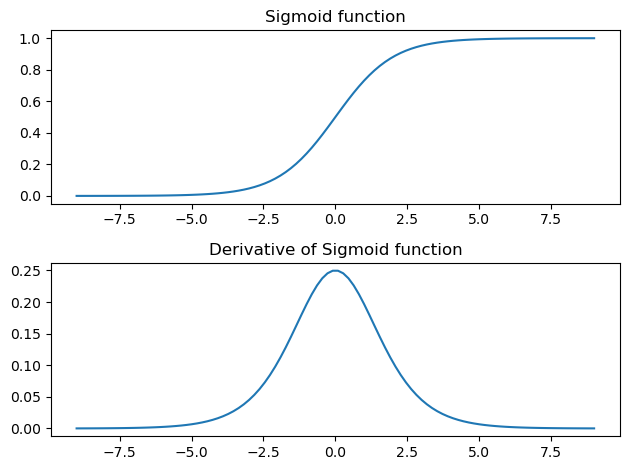

In [55]:
my_model = NeuralNetwork()
x = np.linspace(-9,9,100)
y = my_model.sigmoid(x)
dy = my_model.sigmoidprime(x)

fig, axes = plt.subplots(2)
axes[0].plot(x,y)
axes[0].set_title('Sigmoid function')
axes[1].plot(x,dy)
axes[1].set_title('Derivative of Sigmoid function')
plt.tight_layout()


# Test forward path

0.6044986966482602


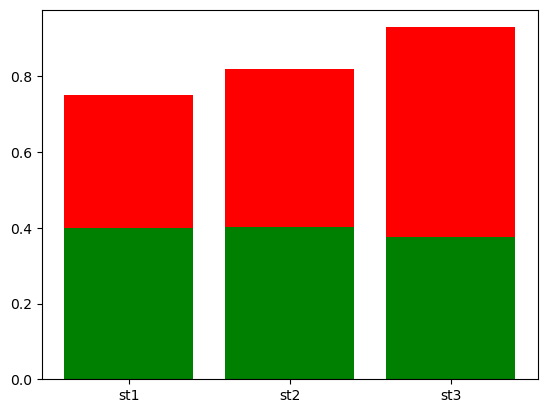

In [51]:
my_model = NeuralNetwork()

yhat = my_model.forward(X_train)
plt.figure()
plt.bar(['st1','st2','st3'],np.squeeze(y_train),color='r')
plt.bar(['st1','st2','st3'],np.squeeze(yhat),color='g')

print(my_model.cost_function(X_train,y_train))

# Test derivatives

In [58]:
my_model = NeuralNetwork()

dJdW1, dJdW2 = my_model.backpropagation( X_train, y_train)

print(dJdW1)
print(dJdW2)

alpha = 0.1
my_model.w1 = my_model.w1 - alpha * dJdW1
my_model.w2 = my_model.w2 - alpha * dJdW2

[[-0.00409512 -0.0078524  -0.01434621]
 [-0.00240944 -0.00516565 -0.00923265]]
[[-0.07936982]
 [-0.04868943]
 [-0.04725761]]


# Test Training

Text(0, 0.5, 'Loss Values')

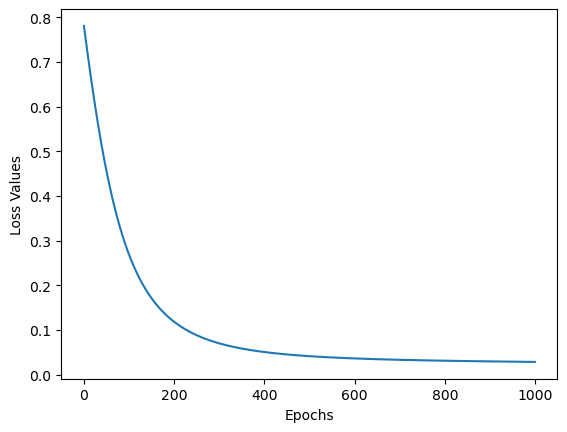

In [68]:
my_model = NeuralNetwork() 
y_hat_before_training = my_model.forward(X_train)
history = my_model.fit(X_train, y_train, alpha=0.05, n_epoch = 1000)

plt.figure()
plt.plot(history)
plt.xlabel('Epochs')
plt.ylabel('Loss Values')



0.7887088433483426
0.028234510092839483


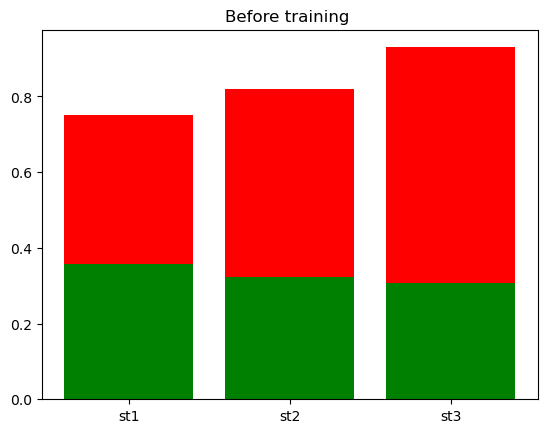

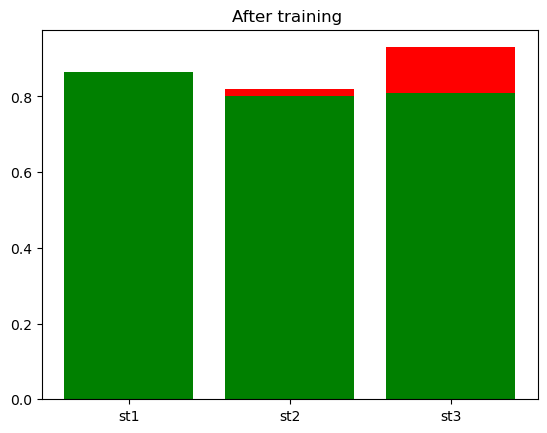

In [69]:
y_hat_after_training = my_model.forward(X_train)

plt.figure()
plt.bar(['st1','st2','st3'],np.squeeze(y_train),color='r')
plt.bar(['st1','st2','st3'],np.squeeze(y_hat_before_training),color='g')
plt.title('Before training ')
print(np.sum((y_hat_before_training - y_train)**2))
plt.figure()
plt.bar(['st1','st2','st3'],np.squeeze(y_train),color='r')
plt.bar(['st1','st2','st3'],np.squeeze(y_hat_after_training),color='g')
plt.title('After training ')
print(my_model.cost_function(X_train,y_train))